In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from scipy import stats
from scipy.stats import norm, skew 

plt.style.use('ggplot')

In [3]:
df = pd.read_csv("training.csv", sep=";")
df

C:\Users\taras\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006,7.0,8.0,17.8,29.7,No,0.2,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70235,2015-09-13,Cairns,19.2,29.1,0.0,NaN,NaN,ESE,52.0,SSE,...,56.0,1021.2,1017.4,NaN,1.0,24.8,27.2,No,8.2,Yes
70236,2015-09-14,Cairns,20.0,28.2,8.2,NaN,NaN,SE,50.0,SSE,...,62.0,1019.8,1016.4,8.0,7.0,23.6,25.7,Yes,0.0,No
70237,2015-09-15,Cairns,19.8,29.1,0.0,NaN,NaN,ESE,41.0,SSE,...,54.0,1018.7,1015.2,8.0,8.0,25.3,27.4,No,3.4,Yes
70238,2015-09-16,Cairns,18.8,28.3,3.4,NaN,NaN,SE,33.0,SSE,...,44.0,1018.9,1014.7,NaN,NaN,24.1,27.6,Yes,0.0,No


In [4]:
print(df.shape)
print(df["Date"].nunique())
print(df["Date"].value_counts())

(70240, 24)
3120
2013-05-29    30
2014-07-28    30
2013-11-29    30
2014-09-07    30
2013-08-31    30
              ..
2016-04-24     1
2007-12-26     1
2016-07-02     1
2008-01-19     1
2016-07-01     1
Name: Date, Length: 3120, dtype: int64


In [5]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM
count,69882.000000,70080.000000,69428.000000,42191.000000,37113.000000,65579.000000,69212.000000,69152.000000,69185.000000,69305.000000,45778.000000,45115.000000,69502.000000,69581.000000,70240.000000
mean,11.355741,22.152277,2.472825,4.925332,7.229785,39.641044,13.557519,18.313801,71.686551,53.264873,4.531478,4.640386,15.879927,20.721841,2.484011
std,6.292392,6.830980,8.810472,3.614322,3.820706,14.228323,9.242076,9.275690,17.734285,20.350925,2.866080,2.665981,6.202170,6.642916,8.813653
min,-8.500000,-4.100000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,3.000000,1.000000,0.000000,0.000000,-6.200000,-5.100000,0.000000
25%,6.800000,17.300000,0.000000,2.400000,4.300000,30.000000,7.000000,11.000000,60.000000,39.000000,1.000000,2.000000,11.400000,16.000000,0.000000
50%,11.300000,21.700000,0.000000,4.200000,8.000000,37.000000,13.000000,17.000000,72.000000,53.000000,5.000000,5.000000,15.800000,20.300000,0.000000
75%,16.200000,26.800000,0.800000,6.600000,10.300000,48.000000,19.000000,24.000000,85.000000,67.000000,7.000000,7.000000,20.500000,25.200000,0.800000
max,30.500000,47.300000,371.000000,64.800000,14.300000,135.000000,87.000000,83.000000,100.000000,100.000000,9.000000,8.000000,37.700000,46.100000,371.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70240 entries, 0 to 70239
Data columns (total 24 columns):
Date             70240 non-null object
Location         70240 non-null object
MinTemp          69882 non-null float64
MaxTemp          70080 non-null float64
Rainfall         69428 non-null float64
Evaporation      42191 non-null float64
Sunshine         37113 non-null float64
WindGustDir      65571 non-null object
WindGustSpeed    65579 non-null float64
WindDir9am       63981 non-null object
WindDir3pm       68343 non-null object
WindSpeed9am     69212 non-null float64
WindSpeed3pm     69152 non-null float64
Humidity9am      69185 non-null float64
Humidity3pm      69305 non-null float64
Pressure9am      62341 non-null object
Pressure3pm      62389 non-null object
Cloud9am         45778 non-null float64
Cloud3pm         45115 non-null float64
Temp9am          69502 non-null float64
Temp3pm          69581 non-null float64
RainToday        69428 non-null object
RISK_MM          70

In [7]:
label = "RainTomorrow"
real_vars = ["MinTemp",
             "MaxTemp",
             "Rainfall",
             "Evaporation",
             "Sunshine",
             "WindGustSpeed",
             "WindSpeed9am",
             "WindSpeed3pm",
             "Humidity9am",
             "Humidity3pm",
             "Pressure9am",
             "Pressure3pm",
             "Cloud9am",
             "Cloud3pm",
             "Temp9am",
             "Temp3pm",
             "RISK_MM"]

cat_vars = ["Location",
             "WindGustDir",
             "WindDir9am",
             "WindDir3pm",
             "RainToday"]

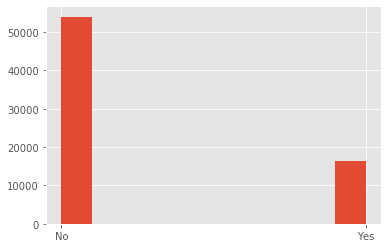

In [8]:
df[label].hist()

In [9]:
df[label].describe()

count     70240
unique        2
top          No
freq      53973
Name: RainTomorrow, dtype: object

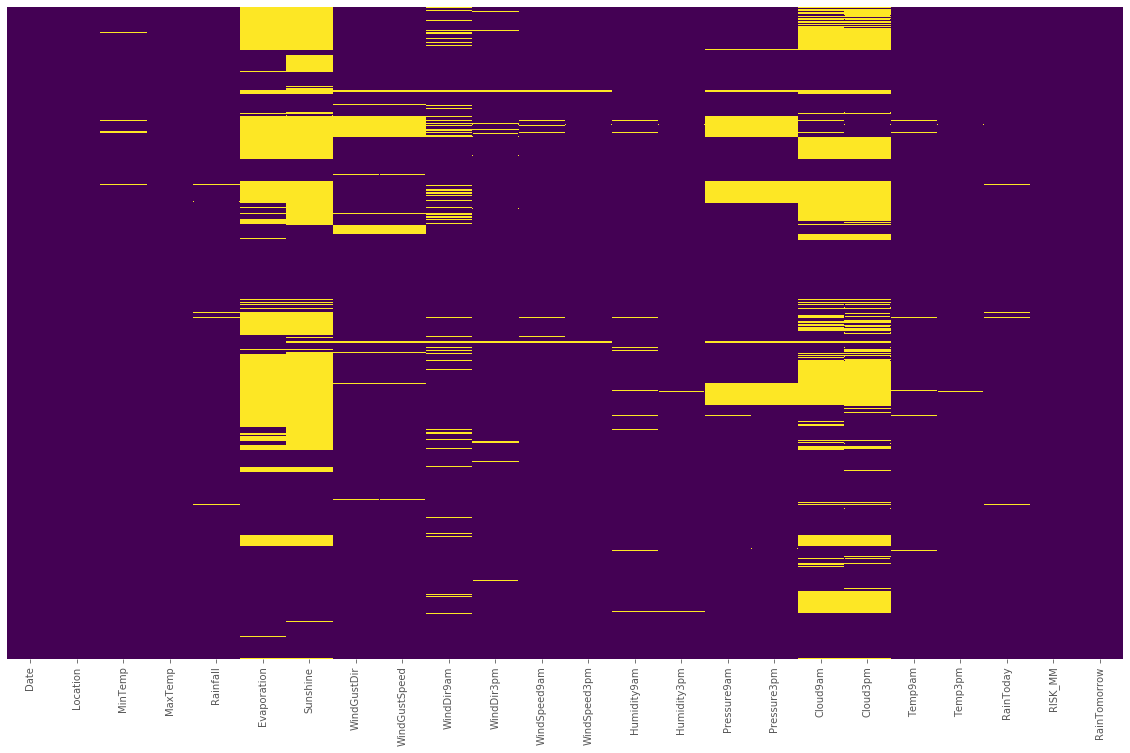

In [10]:
fig, ax = plt.subplots(figsize=(20,12))
sns_heatmap = sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

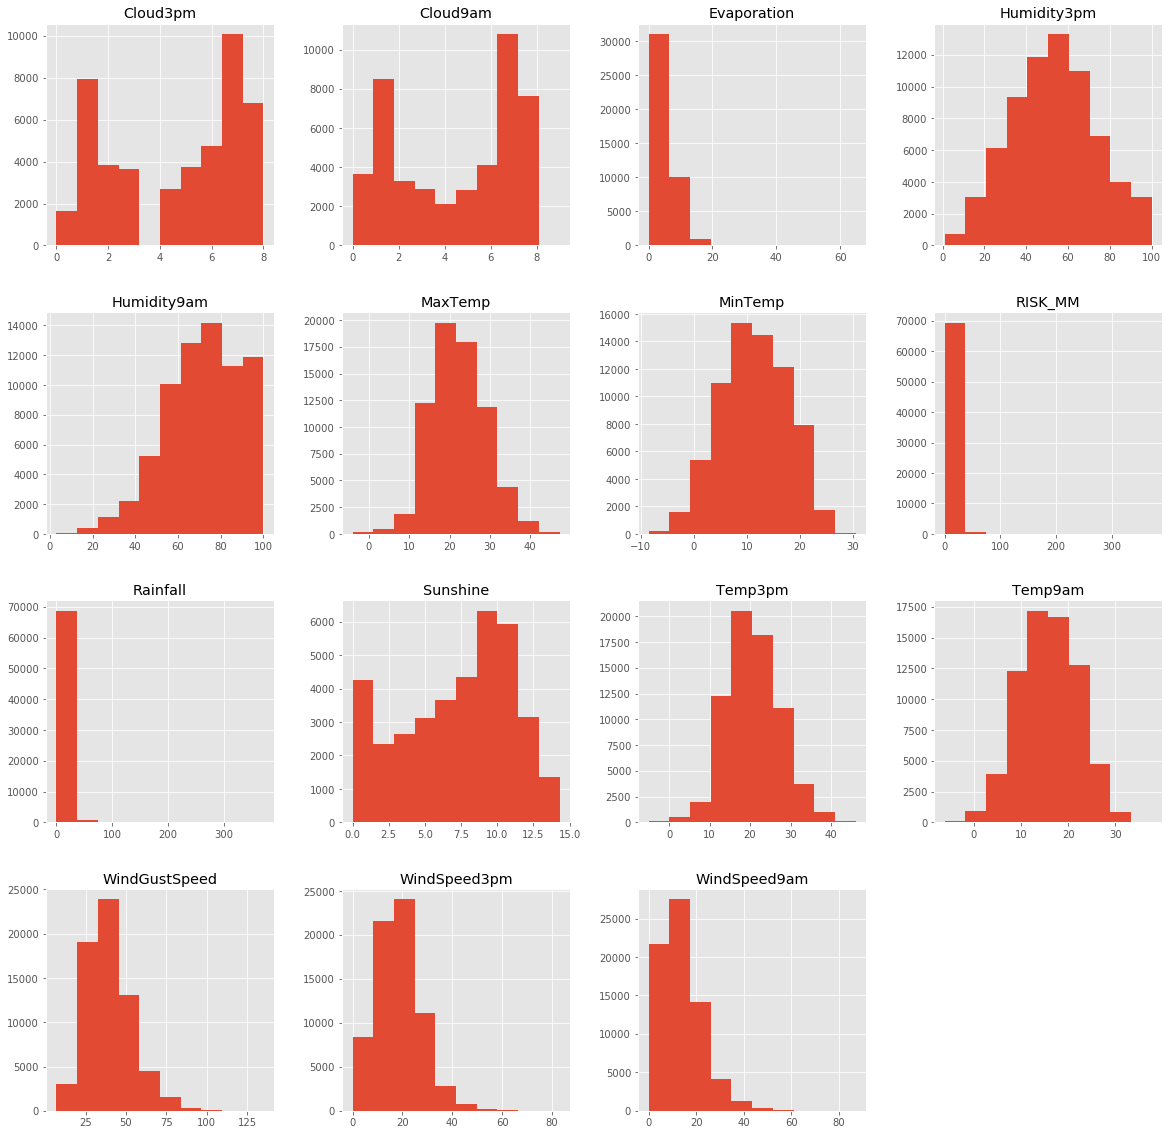

In [11]:
df[real_vars].hist(figsize=(20, 20));

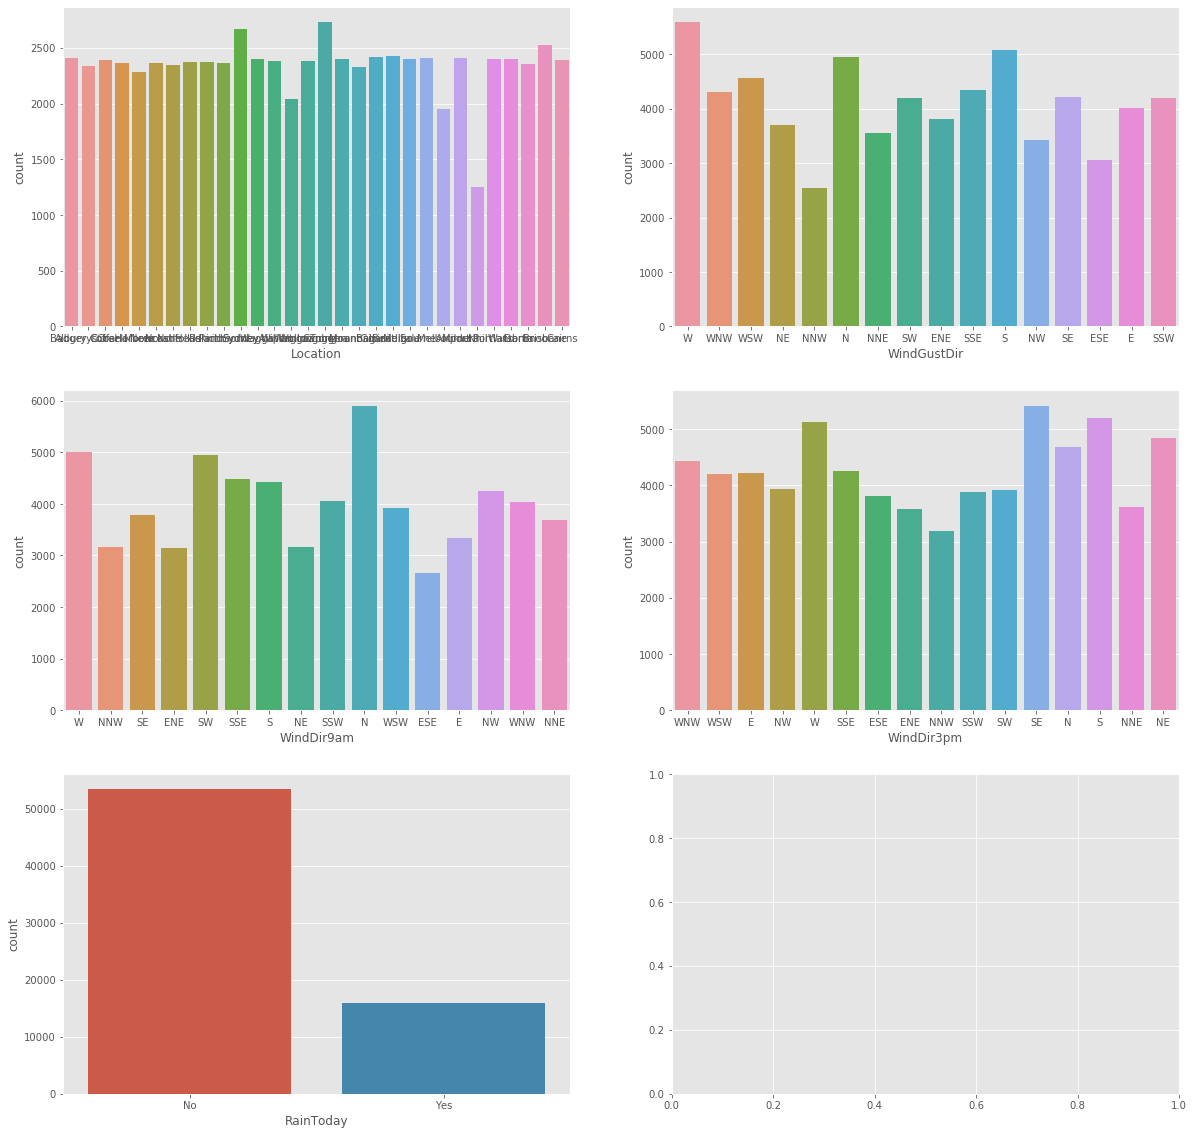

In [42]:
fig, axes = plt.subplots(3,2, figsize=(20, 20))

for i in range(len(cat_vars)):
    sns.countplot(x = cat_vars[i], data = df, ax = axes[i // 2, i % 2])

In [41]:
print(df[df[label] == "Yes"]["RISK_MM"])
_ = df[df[label] == "Yes"]["RISK_MM"].plot

8         1.4
10        2.2
11       15.6
12        3.6
15       16.8
         ... 
70191     5.2
70213     2.2
70214     8.6
70235     8.2
70237     3.4
Name: RISK_MM, Length: 16267, dtype: float64


In [37]:
print(df[df[label] == "No"]["RISK_MM"])

0        0.0
1        0.0
2        0.0
3        1.0
4        0.2
        ... 
70233    0.6
70234    0.0
70236    0.0
70238    0.0
70239    0.0
Name: RISK_MM, Length: 53973, dtype: float64


# Препроцесинг

In [ ]:
#Логорифмировать
#Пожать категориальные 

In [45]:
data = df.copy()
data[real_vars].fillna(0, inplace = True)

to_drop = ["Date", "WindGustDir", "WindDir9am", "WindDir3pm"]
data = data.drop(columns = to_drop)
data.info()
data["Pressure9am"] = pd.to_numeric(data["Pressure9am"], errors='coerce')
data["Pressure3pm"] = pd.to_numeric(data["Pressure3pm"], errors='coerce')
data = pd.get_dummies(data, columns = ["Location", "RainToday"], dummy_na=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70240 entries, 0 to 70239
Data columns (total 20 columns):
Location         70240 non-null object
MinTemp          69882 non-null float64
MaxTemp          70080 non-null float64
Rainfall         69428 non-null float64
Evaporation      42191 non-null float64
Sunshine         37113 non-null float64
WindGustSpeed    65579 non-null float64
WindSpeed9am     69212 non-null float64
WindSpeed3pm     69152 non-null float64
Humidity9am      69185 non-null float64
Humidity3pm      69305 non-null float64
Pressure9am      62341 non-null object
Pressure3pm      62389 non-null object
Cloud9am         45778 non-null float64
Cloud3pm         45115 non-null float64
Temp9am          69502 non-null float64
Temp3pm          69581 non-null float64
RainToday        69428 non-null object
RISK_MM          70240 non-null float64
RainTomorrow     70240 non-null object
dtypes: float64(15), object(5)
memory usage: 10.7+ MB
<class 'pandas.core.frame.DataFrame'>
Rang

In [46]:
data.to_csv("training_prepared.csv")